In [1]:
pip install tensorflow


  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4835 sha256=bc8abeefbf9f14d2a2fb57447a550603451ef03b7222af1ec25dc68394692eb7
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\a0\16\9c\5473df82468f958445479c59e784896fa24f4a5fc024b0f501
Successfully built termcolor
  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 2.0.0
    Uninstalling importlib-metadata-2.0.0:
      Successfully uninstalled importlib-metadata-2.0.0


In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import PIL
import cv2
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop

In [19]:
img = image.load_img("FarmProducts/train/Regumes/2.jpg")

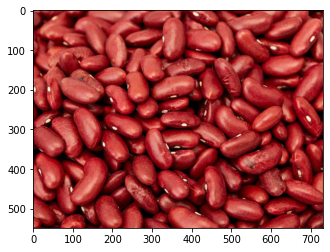

In [20]:
plt.imshow(img)

In [9]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [21]:
cv2.imread("FarmProducts/train/Regumes/2.jpg")

array([[[118, 142, 202],
        [118, 142, 202],
        [121, 143, 201],
        ...,
        [  3,   5,  53],
        [ 16,  13,  63],
        [ 21,  17,  69]],

       [[108, 130, 195],
        [108, 130, 195],
        [110, 130, 195],
        ...,
        [  1,   3,  51],
        [ 11,  10,  60],
        [ 18,  14,  66]],

       [[ 97, 116, 191],
        [ 97, 116, 191],
        [ 99, 115, 191],
        ...,
        [  0,   0,  47],
        [  6,   5,  55],
        [ 11,  10,  60]],

       ...,

       [[124, 124, 240],
        [121, 121, 239],
        [106, 105, 225],
        ...,
        [ 13,  16,  84],
        [  7,  10,  78],
        [  5,   9,  74]],

       [[ 80,  76, 202],
        [ 81,  77, 203],
        [ 70,  64, 195],
        ...,
        [  0,   0,  62],
        [  0,   0,  60],
        [  2,   7,  68]],

       [[ 30,  26, 152],
        [ 36,  32, 158],
        [ 32,  26, 157],
        ...,
        [  0,   0,  62],
        [  0,   0,  60],
        [  2,   7,  68]]

In [22]:
cv2.imread("FarmProducts/train/Regumes/2.jpg").shape

(549, 732, 3)

In [23]:
train = ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale=1/255)

In [24]:
train_dataset = train.flow_from_directory('FarmProducts/train/',
                                         target_size= (200,200),
                                         batch_size = 3,
                                         class_mode = 'binary')
validation_dataset = validation.flow_from_directory('FarmProducts/validation/',
                                         target_size=(200,200),
                                         batch_size = 3,
                                         class_mode ='binary')

Found 41 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [25]:
train_dataset.class_indices

{'Regumes': 0, 'Vagetables': 1}

In [26]:
model = tf.keras.models.Sequential([ tf.keras.layers.Conv2D(16, (3,3),activation = 'relu', input_shape =(200,200,3)),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  #
                                   tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  #
                                  tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  ##
                                  tf.keras.layers.Flatten(),
                                  ##
                                  tf.keras.layers.Dense(512, activation= 'relu'),
                                  ##
                                  tf.keras.layers.Dense(1, activation= 'sigmoid')
                                  ])

In [27]:
model.compile(loss= 'binary_crossentropy',
             optimizer = RMSprop(learning_rate=0.001),
             metrics =['accuracy'])

In [34]:
#training the model
model_fit = model.fit(train_dataset,
                     steps_per_epoch =5,
                     epochs= 30,
                     validation_data = validation_dataset)

Epoch 1/30
5/5 [==============================] - 3s 715ms/step - loss: 6.0193e-05 - accuracy: 1.0000 - val_loss: 3.7113 - val_accuracy: 0.8000
Epoch 2/30
5/5 [==============================] - 4s 757ms/step - loss: 1.2756e-04 - accuracy: 1.0000 - val_loss: 2.6124 - val_accuracy: 0.7000
Epoch 3/30
5/5 [==============================] - 3s 674ms/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 5.5185 - val_accuracy: 0.6500
Epoch 4/30
5/5 [==============================] - 3s 678ms/step - loss: 0.0306 - accuracy: 1.0000 - val_loss: 53.6288 - val_accuracy: 0.6500
Epoch 5/30
5/5 [==============================] - 3s 695ms/step - loss: 9.2891 - accuracy: 0.8000 - val_loss: 5.4940 - val_accuracy: 0.8000
Epoch 6/30
5/5 [==============================] - 3s 709ms/step - loss: 0.0097 - accuracy: 1.0000 - val_loss: 5.0940 - val_accuracy: 0.8000
Epoch 7/30
5/5 [==============================] - 4s 719ms/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 5.2182 - val_accuracy: 0.8000
Epoch 8/30


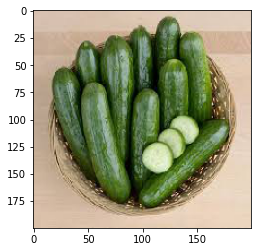

vagetables


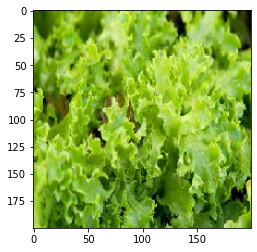

vagetables


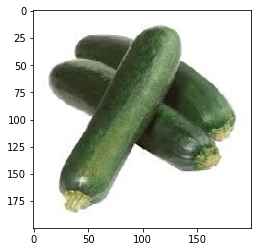

vagetables


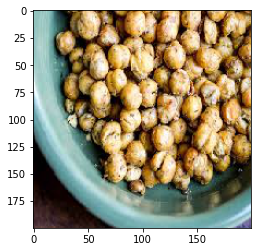

regumes


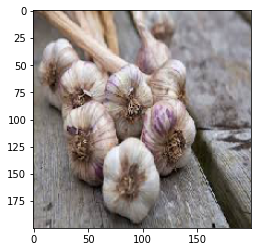

vagetables


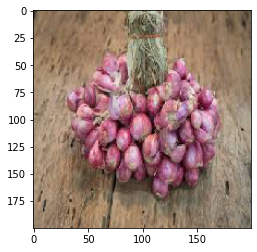

vagetables


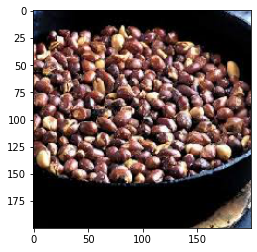

regumes


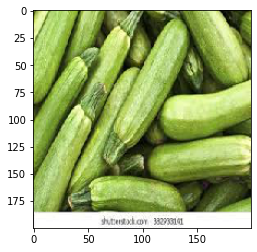

vagetables


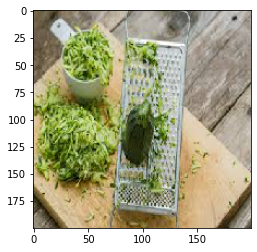

vagetables


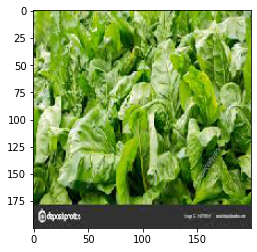

vagetables


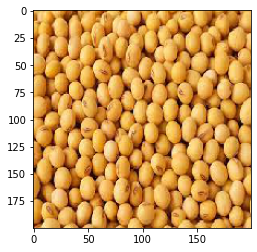

regumes


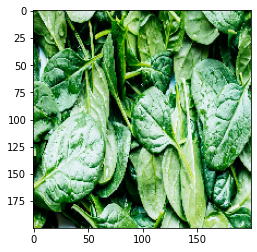

vagetables


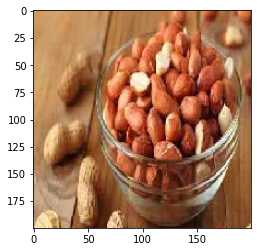

regumes


In [35]:
#testing the model
dir_path = "FarmProducts/test"

for i in os.listdir(dir_path):
    img = image.load_img(dir_path+'//'+ i, target_size=(200, 200))
    plt.imshow(img)
    plt.show()
    
    X = image.img_to_array(img)
    X = np.expand_dims(X,axis =0)
    images = np.vstack([X])
    
    val = model.predict(images)
    if val == 0:
        print("regumes")
    else:
        print ("vagetables")
    
    